In [9]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [10]:
secretnumber = '10101011'

In [11]:
qc = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

In [12]:
qc.h(range(len(secretnumber)))
qc.x(len(secretnumber))
qc.h(len(secretnumber))
qc.barrier()

In [13]:
for i, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        qc.cx(i, len(secretnumber))

# qc.cx(5,7)
# qc.cx(1,7)
# qc.cx(0,7)
qc.barrier()

In [14]:
qc.h(range(len(secretnumber)))

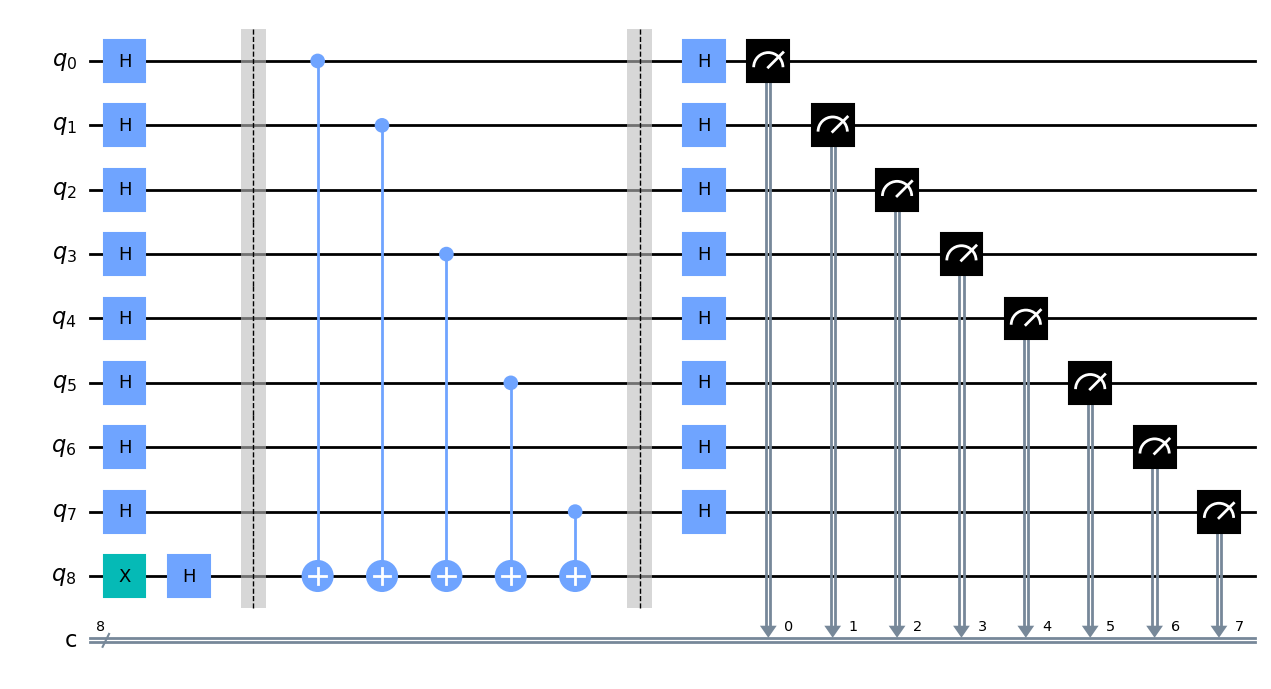

In [15]:
qc.measure(range(len(secretnumber)), range(len(secretnumber)))
qc.draw('mpl')

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
counts = result.get_counts(qc)
print(counts)

{'10101011': 1}
